In [22]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

## Q1
a) Plot function

In [15]:
#import the dataset
w3_classif = pd.read_csv('w3classif.csv', header=None)
w3_classif = w3_classif.rename(columns={0: "x1", 1: "x2", 2:'y'})

#classify our x and y
X = w3_classif[['x1', 'x2']]
y = w3_classif['y']

#Create a dictionary to store our data

#save multiple test-train sets
def testing(split_pct):

        sets = {'X_train': [],
        'X_test': [],
        'y_train': [],
        'y_test': []}

        for i in range(10): 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_pct)
                sets['X_train'].append(X_train)
                sets['X_test'].append(X_test)
                sets['y_train'].append(y_train)
                sets['y_test'].append(y_test)
        return sets

sets = testing(0.3)

## Q2)
Calculate the training and test errors over all the datasets

In [18]:
def accuracy_scores(k, sets):    
    misclassification = []
    MSE = []

    for i in range(10):
        
        clf = KNeighborsClassifier(k)
        y_test = sets['y_test'][i]
        y_pred = clf.fit(sets['X_train'][i], sets['y_train'][i]).predict(sets['X_test'][i])
        
        misclassification.append(round(1 - accuracy_score(y_test, y_pred), 5))
        MSE.append(round(np.mean((y_pred - y_test) ** 2), 5))
        
        # train_loss = np.mean((clf.predict(X_train2.to_numpy().reshape(-1,1)) - y_train2) ** 2)
    return MSE, misclassification
#observe that these are both the same

MSE, misclassification = accuracy_scores(3, sets)
print(f"average mean squared error: {np.average(MSE)}")
print(f"average misclassification rate: {np.average(misclassification)}")

average mean squared error: 0.044999
average misclassification rate: 0.044999


plot the test loss and train loss

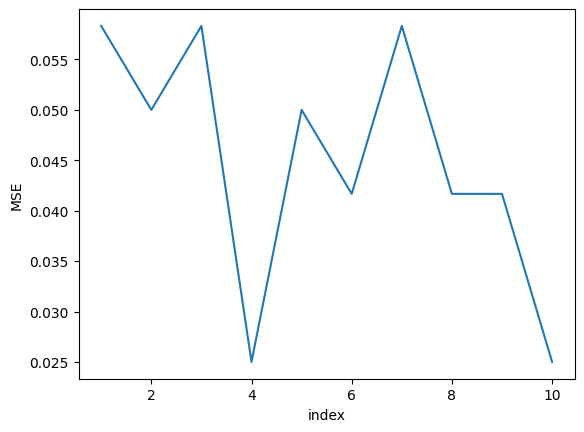

In [11]:
classification = pd.DataFrame(misclassification, columns=['MSE'])
classification = classification.reset_index() #add index
classification['index'] = classification['index'] + 1

sns.lineplot(data=classification, x='index', y='MSE')
plt.show()


## Q3 
#### Repeat Q1 and Q2 but with a different split - both 50/50 and 90/10

In [26]:
sets_50_50 = testing(0.50)
sets_90_10 = testing(0.90)

MSE_5050, misclassification_5050 = accuracy_scores(3, sets_50_50)

print("50/50 split:")
print(MSE_5050)
print(f"average mean squared error: {np.average(MSE_5050)}")

MSE_9010, misclassification_9010 = accuracy_scores(3, sets_90_10)

print("90/10 split:")
print(MSE_9010)
print(f"average mean squared error: {np.average(MSE_9010)}")

#ans: it seems that the 50/50 split is about the same as the 30/70, but the 90/10 has larger 
#misclassification errors

50/50 split:
[0.055, 0.045, 0.06, 0.08, 0.04, 0.045, 0.025, 0.045, 0.04, 0.035]
average mean squared error: 0.047
90/10 split:
[0.04444, 0.04722, 0.04167, 0.03889, 0.05278, 0.05, 0.075, 0.04167, 0.05, 0.04722]
average mean squared error: 0.048888999999999995


## Q4) 
Calculate the standard deviation of your training and test error values over the 10 trials from Q2 and Q3

In [25]:
#also use the cross validation score:
clf = KNeighborsClassifier(3)
scores = cross_val_score(clf, X, y, cv=5)
print(f"SCORES: {scores}")

#ask a question about this




SCORES: [0.9625 0.975  0.9625 0.95   0.925 ]
